<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [9]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Chosen test: Reading, Grade 4

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [11]:
grade_4_expend = np.array(df["GRADES_4_G"])
total_revenue = np.array(df["TOTAL_REVENUE"])
instr_expend = np.array(df["INSTRUCTION_EXPENDITURE"])
grade_4_scores = np.array(df["AVG_READING_4_SCORE"])
enrollments = np.array(df["ENROLL"])
expend_per_student = []
proportion_education = []
for i in range(len(enrollments)):          #avoid division errors due to nan
    if(enrollments[i] == enrollments[i] and instr_expend[i] == instr_expend[i]):
        expend_per_student.append(instr_expend[i]/enrollments[i])
    else:
        expend_per_student.append(float('nan'))
        
for j in range(len(total_revenue)):           # avoid division errors due to nan
    if(total_revenue[j] == total_revenue[j] and instr_expend[j] == instr_expend[j]):
        proportion_education.append(instr_expend[j]/total_revenue[j])
    else:
        proportion_education.append(float('nan'))

Final feature list: Grade 4 expenditure, total revenue, total instruction expenditure, enrollment

Feature selection justification: Grade 4 expenditure is very specific to grade 4 test scores. Total revenue is a (very rough) indicator of how rich a state is, which should affect their test scores. Finally, the amount being spent on instruction compared to the amount of revenue roughly indicates how much a state cares about their education programs. Enrollment data is also needed to find the amount spent per student, instead of just an overall, largely meaningless total spending figure.

<h2> EDA </h2>

Visualization 1

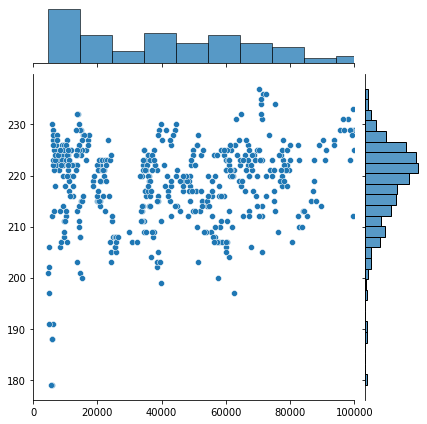

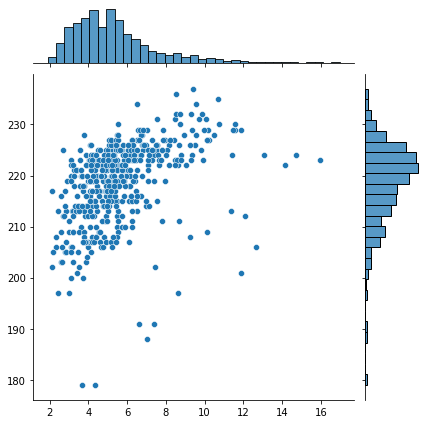

In [12]:
g = sns.jointplot(x=grade_4_expend,y=grade_4_scores)
g.ax_marg_x.set_xlim(0, 100000) #plot only to 100K because that's where the vast majority of data is
sns.jointplot(x=expend_per_student,y=grade_4_scores) 

Top Graph: Relationship between Grade 4 spending and test results for spending between $0 and $100K (range limited because there are too many points, and most of the higher values don't contribute anything new anyways). There seems to be a weak positive correlation between spending and results, probably because the populations vary so higher spending doesn't necessarily translate to higher amount spent per student.
Bottom Graph: Relationship between spending per student (overall, no specific grade 4 enrollment data) and test score performance. As expected, the correlation is much stronger (and positive).

Visualization 2

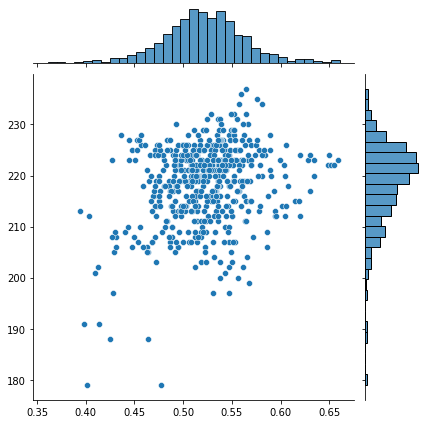

In [13]:
g = sns.jointplot(x=proportion_education,y=grade_4_scores)

Relationship between the proportion a state spends on education (out of its total revenue) and their test results. The correlation is weaker this time, but still definitely positive, showing that states that emphasize education more do indeed get better results.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
traindata = [[expend_per_student[i],proportion_education[i]] for i in range(len(expend_per_student))]
cleaneddata = []
cleanedy = []

for i in range(len(traindata)):
    if not (np.isnan(traindata[i][0]) or np.isnan(traindata[i][1]) or np.isnan(grade_4_scores[i])):
        cleaneddata.append([traindata[i][0],traindata[i][1]]) #only keep if the data isnt nan
        cleanedy.append(grade_4_scores[i]) #needed to ensure X and Y are the same length
X = cleaneddata
y = cleanedy

In [187]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: Regression

In [188]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [189]:
# create your model here
model = LinearRegression()

In [190]:
model.fit(X_train, y_train)

LinearRegression()

In [191]:
y_pred = model.predict(X_test)

In [192]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

ValueError: plot_confusion_matrix only supports classifiers

0.22535925786493882
0.03345704259239514


Text(0, 0.5, 'Grade 4 reading score average')

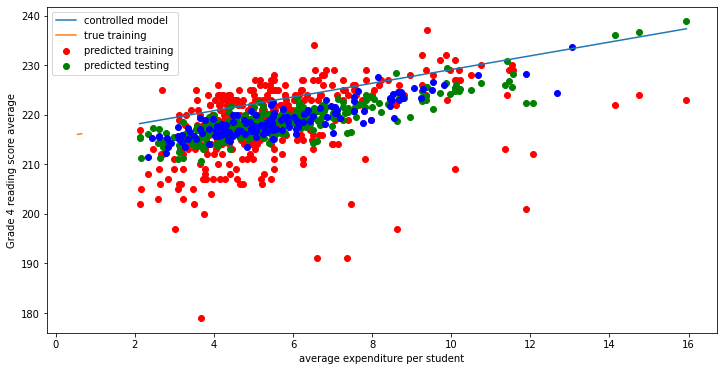

In [193]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.
print(model.score(X_test,y_test))
print(np.mean(model.predict(X_test)-y_test))

col_index = 0
f = plt.figure(figsize=(12,6))
plt.scatter([pair[0] for pair in X_train], y_train, color = "red") #only want avg expenditure/student data
plt.scatter([pair[0] for pair in X_train], model.predict(X_train), color = "green")
plt.scatter([pair[0] for pair in X_test], model.predict(X_test), color = "blue")

sortedXtrain = sorted(X_train)
new_x = np.linspace(sortedXtrain[0],sortedXtrain[len(sortedXtrain)-1],200) #sorted[0] gives the min
intercept = model.predict(sortedXtrain)[0] #the intercept is the y associated with the lowest X
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel('average expenditure per student')
plt.ylabel("Grade 4 reading score average")

<h2> Summary </h2>

I tried to use linear regression based on two variables: amount of money spent per 4th grade student, and proportion of revenue spent on education on the whole. The graph above only shows the relationship between average expenditure per student and test results, with the other variable held constant, which is probably why it looks a little off. There is definitely a positive relationship between these variables and average 4th grade reading scores, but based on the low r-squared value (0.22) it looks like maybe a simple linear relationship isn't accurate enough. Furthermore, student performance is largely based on individual circumstances, so it is probably not possible to predict performance to a high accuracy purely from data on school/state expenditures. However, it does make sense that they are positively correlated and it does help to know, for example, that states that emphasize education do indeed produce results.